In [1]:
from ROOT import *
from pmssm import PMSSM, particleDrawConfig_TeV

Welcome to JupyROOT 6.30/04


In [2]:
root_file_path = "pmssmtree_11aug2023.root"
tree_name = "mcmc"
outdir = "plotsfinal"

In [3]:
root_file = TFile(root_file_path) # type: ignore
intree = root_file.Get(tree_name)

In [4]:
pmssm_plotter = PMSSM(
    intree = intree, 
    outdir = outdir,
    particleConfig= particleDrawConfig_TeV,
    canvasLabel = {
                    "energy" : "13",
                    "extraText" : "Preliminary",
                    "lumi" : "(137-139)",
                },
    defaultOutputFileFormat="png"
    )

pmssm_plotter.impact1D(drawstring="g",variant="variant1")

pmssm_plotter.quantile1D(drawstring="g",variant="variant2")

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: png file plotsfinal/gluino_COMBINED_quantile2D.png has been created


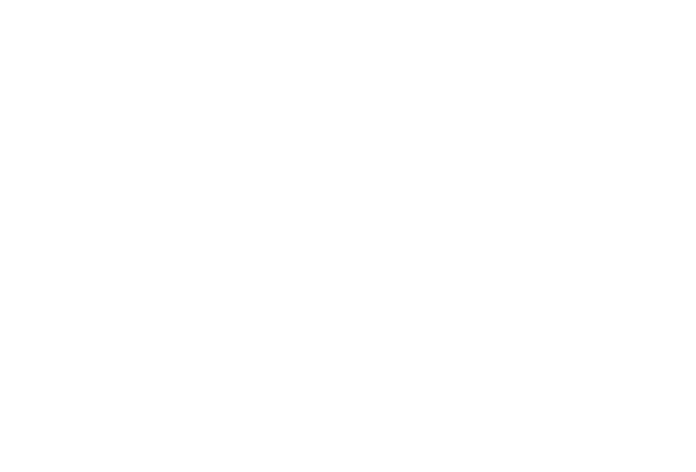

In [5]:
pmssm_plotter.quantile2D(drawstring="abs(chi10):g",quantile=0.5,variant="variant2")